In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# application metadata

In [2]:
application_metadata = pd.read_csv('data/application_metadata - application_metadata.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data/application_metadata - application_metadata.csv'

In [ ]:
application_metadata.head()

,customer_ref,application_id,application_hour,application_day_of_week,account_open_year,preferred_contact,referral_code,account_status_code,random_noise_1,num_login_sessions,num_customer_service_calls,has_mobile_app,paperless_billing,default
0,10000,620515,5,6,2013,Mail,REF0000,ACT-2,1.137099,13,2,1,1,0
1,10001,624978,4,2,2015,Phone,REF0000,ACT-3,-0.164932,6,1,1,1,1
2,10002,564658,10,3,2020,Phone,REF0000,ACT-3,0.526700,1,2,1,0,0
3,10003,621493,7,5,2010,Email,REF0000,A01,-0.709779,4,1,1,1,0
4,10004,637785,1,2,2020,Mail,REF0000,ACT-3,-0.603132,6,2,1,0,0


<Axes: xlabel='random_noise_1', ylabel='Count'>

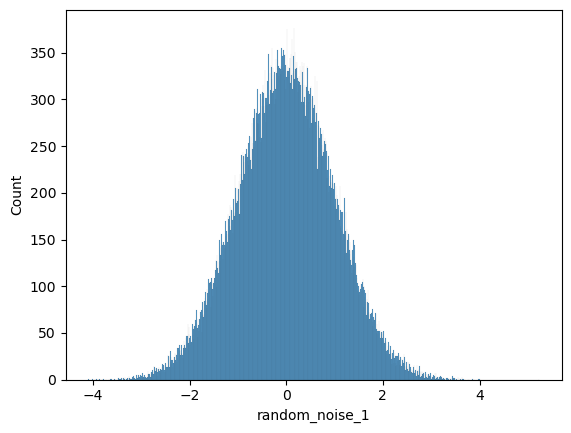

In [ ]:
sns.histplot(data=application_metadata, x='random_noise_1', bins=1000)

In [ ]:
application_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89999 entries, 0 to 89998
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_ref                89999 non-null  int64  
 1   application_id              89999 non-null  int64  
 2   application_hour            89999 non-null  int64  
 3   application_day_of_week     89999 non-null  int64  
 4   account_open_year           89999 non-null  int64  
 5   preferred_contact           89999 non-null  object 
 6   referral_code               89999 non-null  object 
 7   account_status_code         89999 non-null  object 
 8   random_noise_1              89999 non-null  float64
 9   num_login_sessions          89999 non-null  int64  
 10  num_customer_service_calls  89999 non-null  int64  
 11  has_mobile_app              89999 non-null  int64  
 12  paperless_billing           89999 non-null  int64  
 13  default                     899

In [ ]:
application_metadata['application_hour'].value_counts()

application_hour
4     3877
6     3870
10    3845
5     3814
8     3806
18    3797
17    3786
12    3779
7     3763
11    3763
20    3754
2     3748
19    3743
14    3728
21    3725
9     3725
22    3710
13    3697
3     3692
16    3685
0     3685
15    3684
1     3670
23    3653
Name: count, dtype: int64

In [ ]:
application_metadata['application_day_of_week'].value_counts()

application_day_of_week
0    13034
6    13017
4    12960
1    12911
2    12789
3    12718
5    12570
Name: count, dtype: int64

In [ ]:
application_metadata['account_open_year'].value_counts()

account_open_year
2019    6544
2017    6538
2020    6537
2012    6516
2014    6485
2016    6450
2011    6425
2023    6418
2013    6400
2015    6392
2018    6359
2022    6322
2010    6312
2021    6301
Name: count, dtype: int64

In [ ]:
application_metadata['preferred_contact'].value_counts()

preferred_contact
Email    54094
Phone    27023
Mail      8882
Name: count, dtype: int64

In [ ]:
application_metadata['referral_code'].value_counts(normalize=True)

referral_code
REF0000    0.799864
REF4315    0.000144
REF4048    0.000100
REF9450    0.000100
REF2500    0.000089
             ...   
REF9296    0.000011
REF9343    0.000011
REF5100    0.000011
REF2475    0.000011
REF6630    0.000011
Name: proportion, Length: 7805, dtype: float64

In [ ]:
application_metadata['account_status_code'].value_counts()

account_status_code
ACT-1     18118
ACTIVE    18093
A01       18081
ACT-2     17989
ACT-3     17718
Name: count, dtype: int64

In [ ]:
application_metadata['num_login_sessions'].value_counts(normalize=True)

num_login_sessions
7     0.115101
8     0.106679
6     0.101679
9     0.101490
5     0.089612
10    0.086090
11    0.071523
4     0.061734
12    0.059512
13    0.041078
14    0.035478
3     0.034723
15    0.026256
16    0.017811
17    0.011889
2     0.010767
18    0.009233
19    0.006278
20    0.004222
21    0.002500
22    0.001733
1     0.001522
23    0.001333
24    0.000600
25    0.000456
26    0.000311
27    0.000144
28    0.000122
30    0.000056
29    0.000044
31    0.000011
34    0.000011
Name: proportion, dtype: float64

In [ ]:
application_metadata['num_customer_service_calls'].value_counts(normalize=True)

num_customer_service_calls
1     0.274603
2     0.268892
3     0.179446
0     0.134824
4     0.089557
5     0.036367
6     0.011900
7     0.003233
8     0.000944
9     0.000189
11    0.000022
10    0.000022
Name: proportion, dtype: float64

In [ ]:
application_metadata['has_mobile_app'].value_counts(normalize=True)

has_mobile_app
1    0.713308
0    0.286692
Name: proportion, dtype: float64

In [ ]:
application_metadata['paperless_billing'].value_counts(normalize=True)

paperless_billing
1    0.620262
0    0.379738
Name: proportion, dtype: float64

In [ ]:
application_metadata['default'].value_counts(normalize=True)

default
0    0.948955
1    0.051045
Name: proportion, dtype: float64

merged data

In [2]:
merged = pd.read_csv('data/merged_data.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
merged

,customer_id,credit_score,num_credit_accounts,oldest_credit_line_age,oldest_account_age_months,total_credit_limit,num_delinquencies_2yrs,num_inquiries_6mo,recent_inquiry_count,num_public_records,num_collections,account_diversity_index,state,regional_unemployment_rate,regional_median_income,regional_median_rent,housing_price_index,cost_of_living_index,previous_zip_code,loan_type,loan_amount,loan_term,interest_rate,loan_purpose,loan_to_value_ratio,origination_channel,loan_officer_id,marketing_campaign,monthly_income,existing_monthly_debt,monthly_payment,debt_to_income_ratio,debt_service_ratio,payment_to_income_ratio,credit_utilization,revolving_balance,credit_usage_amount,available_credit,total_monthly_debt_payment,annual_debt_payment,loan_to_annual_income,total_debt_amount,monthly_free_cash_flow,age,annual_income,employment_length,employment_type,education,marital_status,num_dependents,application_id,application_hour,application_day_of_week,account_open_year,preferred_contact,referral_code,account_status_code,random_noise_1,num_login_sessions,num_customer_service_calls,has_mobile_app,paperless_billing,default
0,10000,696,14,22.8,273.6,169100.0,0.0,2,2,1,0,0.499,OH,4.8,56000,1380.0,91.0,73.0,451,Personal,"$17,700",36,12.50,Debt Consolidation,0.000,Direct Mail,1045,W,"5,150.00",738.64,$592.13,0.258,0.258402,0.115,0.841,"$142,213.10","$142,213.10","$26,886.90",1330.77,15969.24,0.286408,"159,913.10","3,819.23",41,$61800,2.2,Full-time,Graduate,Married,2,620515,5,6,2013,Mail,REF0000,ACT-2,1.137099,13,2,1,1,0
1,10001,659,13,3.5,42.0,78200.0,0.0,6,6,0,0,0.298,PA,4.4,61000,1510.0,92.0,87.0,537,mortgage,"$114,000",180,6.83,Refinance,0.774,Branch,1011,B,"2,383.33",392.21,"1,013.86",0.590,0.589959,0.425,0.971,"$75,932.20","75,932.20","$2,267.80",1406.07,16872.84,3.986014,"189,932.20",$977.26,38,"28,600",7.0,FULL_TIME,High School,Married,0,624978,4,2,2015,Phone,REF0000,ACT-3,-0.164932,6,1,1,1,1
2,10002,662,3,0.0,0.0,41400.0,0.0,2,2,0,0,0.174,VA,3.9,74000,1920.0,125.0,103.0,679,Personal Loan,"9,300",36,13.99,Major Purchase,0.000,Online,1084,K,"1,725.00",204.07,$317.81,0.303,0.302539,0.184,0.539,22314.6,"22,314.60","$19,085.40",521.88,6262.56,0.449275,31614.6,1203.12,18,"$20,700",0.8,FULL_TIME,Bachelor,Single,0,564658,10,3,2020,Phone,REF0000,ACT-3,0.526700,1,2,1,0,0
3,10003,676,8,9.0,108.0,60000.0,0.0,1,1,0,0,0.263,CA,5.8,75000,1690.0,158.0,121.0,719,PERSONAL,$8700,48,13.26,Medical,0.000,Online,1048,A,"2,616.67",$288.71,234.52,0.200,0.199961,0.090,0.147,"8,820.00",8820.0,"51,180.00",523.23,6278.76,0.277070,"$17,520.00",2093.4366666666665,27,"31,400",4.8,Full Time,Bachelor,Single,0,621493,7,5,2010,Email,REF0000,A01,-0.709779,4,1,1,1,0
4,10004,678,7,8.0,96.0,49700.0,0.0,1,1,0,0,0.298,WA,5.8,78000,1700.0,152.0,127.0,933,Personal,"$7,200",24,10.77,Debt Consolidation,0.000,Branch,1055,S,"2,050.00",$248.77,334.81,0.285,0.284673,0.163,0.488,24253.6,24253.6,"25,446.40",583.58,7002.96,0.292683,"$31,453.60",1466.42,26,$24600,5.2,Fulltime,High School,Single,0,637785,1,2,2020,Mail,REF0000,ACT-3,-0.603132,6,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89994,99994,817,10,8.2,98.4,135600.0,0.0,1,1,0,0,0.285,CA,5.8,75000,1830.0,168.0,138.0,933,personal,"$11,300",24,9.70,Home Improvement,0.000,Branch,1050,O,"6,025.00","2,120.97",519.87,0.438,0.438314,0.086,0.359,"48,680.40","48,680.40","$86,919.60","2,640.84",31690.08,0.156293,"$59,980.40","$3,384.16",52,"$72,300",3.7,Full-time,Bachelor,Single,1,585752,13,5,2016,Email,REF0000,A01,1.628917,10,3,0,1,0
89995,99995,745,9,8.8,105.6,44600.0,0.0,1,1,0,0,0.353,IL,4.9,65000,1900.0,99.0,84.0,536,personal,"16,500",36,11.67,Other,0.000,Branch,1071,D,"$1,666.67",138.97,$545.44,0.411,0.410646,0.327,0.355,"15,833.00",15833.0,"$28,767.00",$684.41,8212.92,0.825000,32333.0,982.26,61,"20,000",4.2,Full-time,High S

In [5]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89999 entries, 0 to 89998
Data columns (total 63 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 89999 non-null  int64  
 1   credit_score                89999 non-null  int64  
 2   num_credit_accounts         89999 non-null  int64  
 3   oldest_credit_line_age      89999 non-null  float64
 4   oldest_account_age_months   89999 non-null  float64
 5   total_credit_limit          89999 non-null  float64
 6   num_delinquencies_2yrs      89167 non-null  float64
 7   num_inquiries_6mo           89999 non-null  int64  
 8   recent_inquiry_count        89999 non-null  int64  
 9   num_public_records          89999 non-null  int64  
 10  num_collections             89999 non-null  int64  
 11  account_diversity_index     89999 non-null  float64
 12  state                       89999 non-null  object 
 13  regional_unemployment_rate  899

In [6]:
merged[merged['num_delinquencies_2yrs'].isna()]

,customer_id,credit_score,num_credit_accounts,oldest_credit_line_age,oldest_account_age_months,total_credit_limit,num_delinquencies_2yrs,num_inquiries_6mo,recent_inquiry_count,num_public_records,num_collections,account_diversity_index,state,regional_unemployment_rate,regional_median_income,regional_median_rent,housing_price_index,cost_of_living_index,previous_zip_code,loan_type,loan_amount,loan_term,interest_rate,loan_purpose,loan_to_value_ratio,origination_channel,loan_officer_id,marketing_campaign,monthly_income,existing_monthly_debt,monthly_payment,debt_to_income_ratio,debt_service_ratio,payment_to_income_ratio,credit_utilization,revolving_balance,credit_usage_amount,available_credit,total_monthly_debt_payment,annual_debt_payment,loan_to_annual_income,total_debt_amount,monthly_free_cash_flow,age,annual_income,employment_length,employment_type,education,marital_status,num_dependents,application_id,application_hour,application_day_of_week,account_open_year,preferred_contact,referral_code,account_status_code,random_noise_1,num_login_sessions,num_customer_service_calls,has_mobile_app,paperless_billing,default
25,10025,698,12,9.5,114.0,26200.0,NaN,1,1,0,1,0.419,AZ,4.8,58000,1420.0,112.0,94.0,559,PERSONAL,$25300,60,13.19,Debt Consolidation,0.000,Broker,1082,H,"1,866.67",$297.33,578.12,0.469,0.468991,0.310,0.487,12759.4,"$12,759.40","13,440.60",875.45,10505.40,1.129464,"$38,059.40",991.22,34,$22400,1.6,FT,High School,Married,2,559682,3,5,2023,Phone,REF0000,ACT-2,2.363746,8,3,1,0,0
26,10026,666,5,10.4,124.8,115400.0,NaN,1,1,0,0,0.255,PA,4.7,61000,1510.0,108.0,85.0,126,mortgage,"119,900",360,5.55,Home Purchase,0.731,Branch,1018,G,$4742,"$1,100.92",684.55,0.377,0.376549,0.144,0.220,"$25,388.00",25388.0,"$90,012.00","1,785.47",21425.64,2.107206,"145,288.00","$2,956.20",45,"$56,900",7.0,Self-employed,Bachelor,Married,1,633430,12,0,2019,Mail,REF2750,ACTIVE,1.589386,12,0,1,0,0
94,10094,834,10,8.5,102.0,194200.0,NaN,0,0,0,0,0.286,NY,4.6,72000,1910.0,144.0,112.0,192,Personal,"$17,000",24,10.44,Medical,0.000,Branch,1001,X,"$8,291.67",2007.42,$787.92,0.337,0.337126,0.095,0.548,106421.6,"$106,421.60","$87,778.40","$2,795.34",33544.08,0.170854,"$123,421.60","5,496.33",51,"99,500",7.2,Self-employed,Advanced,Married,2,636706,12,3,2022,Email,REF0000,ACT-2,1.086939,11,3,1,1,0
201,10201,681,8,15.6,187.2,28000.0,NaN,2,2,1,0,0.373,PA,4.1,61000,1430.0,93.0,77.0,218,CC,"$12,100",0,16.45,Revolving Credit,0.000,Broker,1011,J,"3,333.33",975.51,363.00,0.402,0.401553,0.109,0.225,6300.0,6300.0,"$21,700.00","$1,338.51",16062.12,0.302500,"$18,400.00",1994.8233333333335,34,$40000,6.3,CONTRACT,Advanced,Divorced,0,572712,4,0,2018,Phone,REF0000,ACT-3,-1.707577,7,1,0,0,0
232,10232,794,7,16.5,198.0,110100.0,NaN,2,2,0,1,0.348,WA,4.9,78000,1800.0,158.0,125.0,887,CC,"$1,600",0,17.47,Revolving Credit,0.000,Online,1047,A,"$3,216.67",656.97,$48.00,0.219,0.219162,0.015,0.103,"$11,340.30","11,340.30","$98,759.70",704.97,8459.64,0.041451,12940.3,"$2,511.70",49,"38,600",3.8,Self Employed,Bachelor,Divorced,1,599588,20,2,2018,Email,REF0000,ACT-3,0.526700,9,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89622,99622,659,7,15.0,180.0,18200.0,NaN,3,3,0,0,0.424,TX,3.5,61000,1850.0,104.0,86.0,195,MORTGAGE,$414700,360,6.83,Home Purchase,0.782,Online,998,Q,"$1,666.67",436.59,"2,711.83",1.889,1.889052,1.627,0.548,"$9,973.60",9973.6,8226.4,"$3,148.42",37781.04,20.735000,"$424,673.60","$-1,481.75",33,"20,000",4.9,SELF_EMPLOYED,Graduate,Married,1,544942,7,1,2014,Email,REF0000,ACT-3,0.104522,9,2,1,1,0
89639,99639,693,16,7.4,88.8,63400.0,NaN,1,1,0,0,0.405,FL,4.8,55000,1290.0,115.0,83.0,283,Home Loan,"240,700",360,8.94,Refinance,0.819,Online,1081,E,"2,100.00",724.94,1926.34,1.263,1.262514,0.917,0.356,22570.4,22570.4,"$40,829.60","$2,651.28",31815.36,9.551587,"263,270.40",-551.279

In [7]:
merged['employment_type'].value_counts()

employment_type
Full-time        12716
Full Time        12692
FULL_TIME        12608
Fulltime         12582
FT               12419
SELF_EMPLOYED     3409
Self Emp          3397
Self Employed     3327
Self-employed     3303
PART_TIME         2296
Part-time         2266
PT                2247
Part Time         2198
Contractor        1560
CONTRACT          1534
Contract          1445
Name: count, dtype: int64

In [8]:
merged['employment_type'].replace({'Full Time': 'Full-time', 'FULL_TIME': 'Full-time', 'Fulltime': 'Full-time', 'FT': 'Full-time',
                                   'SELF_EMPLOYED': 'Self-employed', 'Self Emp': 'Self-employed', 'Self Employed': 'Self-employed',
                                   'PART_TIME': 'Part-time', 'PT': 'Part-time', 'Part Time': 'Part-time',
                                   'Contractor': 'Contract', 'CONTRACT': 'Contract'}, inplace=True)

C:\Users\Triston\AppData\Local\Temp\ipykernel_22676\2262014725.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged['employment_type'].replace({'Full Time': 'Full-time', 'FULL_TIME': 'Full-time', 'Fulltime': 'Full-time', 'FT': 'Full-time',


In [9]:
merged['employment_type'].value_counts()

employment_type
Full-time        63017
Self-employed    13436
Part-time         9007
Contract          4539
Name: count, dtype: int64

In [10]:
merged['loan_type'].value_counts()

loan_type
Personal         9097
Personal Loan    9061
personal         9050
PERSONAL         9024
Mortgage         7919
Home Loan        7850
MORTGAGE         7841
mortgage         7819
Credit Card      5698
CreditCard       5659
credit card      5497
CC               5484
Name: count, dtype: int64

In [11]:
columns_to_fix = ['loan_amount', 'monthly_income', 'existing_monthly_debt', 'monthly_payment', 
                    'revolving_balance', 'credit_usage_amount', 'available_credit', 'total_debt_amount',
                    'monthly_free_cash_flow', 'annual_income', 'total_monthly_debt_payment']

for col in columns_to_fix:
    # Remove $ sign and commas, then convert to float
    merged[col] = merged[col].astype(str).str.replace(r"[$,]", "", regex=True)
    merged[col] = pd.to_numeric(merged[col], errors='coerce')

In [12]:
merged

,customer_id,credit_score,num_credit_accounts,oldest_credit_line_age,oldest_account_age_months,total_credit_limit,num_delinquencies_2yrs,num_inquiries_6mo,recent_inquiry_count,num_public_records,num_collections,account_diversity_index,state,regional_unemployment_rate,regional_median_income,regional_median_rent,housing_price_index,cost_of_living_index,previous_zip_code,loan_type,loan_amount,loan_term,interest_rate,loan_purpose,loan_to_value_ratio,origination_channel,loan_officer_id,marketing_campaign,monthly_income,existing_monthly_debt,monthly_payment,debt_to_income_ratio,debt_service_ratio,payment_to_income_ratio,credit_utilization,revolving_balance,credit_usage_amount,available_credit,total_monthly_debt_payment,annual_debt_payment,loan_to_annual_income,total_debt_amount,monthly_free_cash_flow,age,annual_income,employment_length,employment_type,education,marital_status,num_dependents,application_id,application_hour,application_day_of_week,account_open_year,preferred_contact,referral_code,account_status_code,random_noise_1,num_login_sessions,num_customer_service_calls,has_mobile_app,paperless_billing,default
0,10000,696,14,22.8,273.6,169100.0,0.0,2,2,1,0,0.499,OH,4.8,56000,1380.0,91.0,73.0,451,Personal,17700,36,12.50,Debt Consolidation,0.000,Direct Mail,1045,W,5150.00,738.64,592.13,0.258,0.258402,0.115,0.841,142213.1,142213.1,26886.9,1330.77,15969.24,0.286408,159913.1,3819.230000,41,61800,2.2,Full-time,Graduate,Married,2,620515,5,6,2013,Mail,REF0000,ACT-2,1.137099,13,2,1,1,0
1,10001,659,13,3.5,42.0,78200.0,0.0,6,6,0,0,0.298,PA,4.4,61000,1510.0,92.0,87.0,537,mortgage,114000,180,6.83,Refinance,0.774,Branch,1011,B,2383.33,392.21,1013.86,0.590,0.589959,0.425,0.971,75932.2,75932.2,2267.8,1406.07,16872.84,3.986014,189932.2,977.260000,38,28600,7.0,Full-time,High School,Married,0,624978,4,2,2015,Phone,REF0000,ACT-3,-0.164932,6,1,1,1,1
2,10002,662,3,0.0,0.0,41400.0,0.0,2,2,0,0,0.174,VA,3.9,74000,1920.0,125.0,103.0,679,Personal Loan,9300,36,13.99,Major Purchase,0.000,Online,1084,K,1725.00,204.07,317.81,0.303,0.302539,0.184,0.539,22314.6,22314.6,19085.4,521.88,6262.56,0.449275,31614.6,1203.120000,18,20700,0.8,Full-time,Bachelor,Single,0,564658,10,3,2020,Phone,REF0000,ACT-3,0.526700,1,2,1,0,0
3,10003,676,8,9.0,108.0,60000.0,0.0,1,1,0,0,0.263,CA,5.8,75000,1690.0,158.0,121.0,719,PERSONAL,8700,48,13.26,Medical,0.000,Online,1048,A,2616.67,288.71,234.52,0.200,0.199961,0.090,0.147,8820.0,8820.0,51180.0,523.23,6278.76,0.277070,17520.0,2093.436667,27,31400,4.8,Full-time,Bachelor,Single,0,621493,7,5,2010,Email,REF0000,A01,-0.709779,4,1,1,1,0
4,10004,678,7,8.0,96.0,49700.0,0.0,1,1,0,0,0.298,WA,5.8,78000,1700.0,152.0,127.0,933,Personal,7200,24,10.77,Debt Consolidation,0.000,Branch,1055,S,2050.00,248.77,334.81,0.285,0.284673,0.163,0.488,24253.6,24253.6,25446.4,583.58,7002.96,0.292683,31453.6,1466.420000,26,24600,5.2,Full-time,High School,Single,0,637785,1,2,2020,Mail,REF0000,ACT-3,-0.603132,6,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89994,99994,817,10,8.2,98.4,135600.0,0.0,1,1,0,0,0.285,CA,5.8,75000,1830.0,168.0,138.0,933,personal,11300,24,9.70,Home Improvement,0.000,Branch,1050,O,6025.00,2120.97,519.87,0.438,0.438314,0.086,0.359,48680.4,48680.4,86919.6,2640.84,31690.08,0.156293,59980.4,3384.160000,52,72300,3.7,Full-time,Bachelor,Single,1,585752,13,5,2016,Email,REF0000,A01,1.628917,10,3,0,1,0
89995,99995,745,9,8.8,105.6,44600.0,0.0,1,1,0,0,0.353,IL,4.9,65000,1900.0,99.0,84.0,536,personal,16500,36,11.67,Other,0.000,Branch,1071,D,1666.67,138.97,545.44,0.411,0.410646,0.327,0.355,15833.0,15833.0,28767.0,684.41,8212.92,0.825000,32333.0,982.260000,61,20000,4.2,Full-time,High School,Divorced,1,595205,13,5,2014,Mail,REF9754,ACTIVE,-0.501960,12,1,1,0,0
89996,99996,607,11,1.0,12.0,18300.0,0.0,2,2,1,0,0.238,CA,5.4,75000,1560.0,157.0,127.0,193

In [13]:
merged['marketing_campaign'].value_counts()

marketing_campaign
Q    3549
N    3541
O    3535
J    3522
E    3511
X    3503
I    3492
M    3486
Z    3485
H    3485
K    3468
A    3463
B    3460
G    3459
V    3458
T    3453
D    3452
C    3451
S    3446
Y    3434
F    3429
U    3420
P    3399
R    3386
W    3369
L    3343
Name: count, dtype: int64

In [14]:
cols_to_drop = ['customer_id', 'application_id', 'random_noise_1', 'referral_code']

In [15]:
merged.drop(columns=cols_to_drop, inplace=True)

In [16]:
merged

,credit_score,num_credit_accounts,oldest_credit_line_age,oldest_account_age_months,total_credit_limit,num_delinquencies_2yrs,num_inquiries_6mo,recent_inquiry_count,num_public_records,num_collections,account_diversity_index,state,regional_unemployment_rate,regional_median_income,regional_median_rent,housing_price_index,cost_of_living_index,previous_zip_code,loan_type,loan_amount,loan_term,interest_rate,loan_purpose,loan_to_value_ratio,origination_channel,loan_officer_id,marketing_campaign,monthly_income,existing_monthly_debt,monthly_payment,debt_to_income_ratio,debt_service_ratio,payment_to_income_ratio,credit_utilization,revolving_balance,credit_usage_amount,available_credit,total_monthly_debt_payment,annual_debt_payment,loan_to_annual_income,total_debt_amount,monthly_free_cash_flow,age,annual_income,employment_length,employment_type,education,marital_status,num_dependents,application_hour,application_day_of_week,account_open_year,preferred_contact,account_status_code,num_login_sessions,num_customer_service_calls,has_mobile_app,paperless_billing,default
0,696,14,22.8,273.6,169100.0,0.0,2,2,1,0,0.499,OH,4.8,56000,1380.0,91.0,73.0,451,Personal,17700,36,12.50,Debt Consolidation,0.000,Direct Mail,1045,W,5150.00,738.64,592.13,0.258,0.258402,0.115,0.841,142213.1,142213.1,26886.9,1330.77,15969.24,0.286408,159913.1,3819.230000,41,61800,2.2,Full-time,Graduate,Married,2,5,6,2013,Mail,ACT-2,13,2,1,1,0
1,659,13,3.5,42.0,78200.0,0.0,6,6,0,0,0.298,PA,4.4,61000,1510.0,92.0,87.0,537,mortgage,114000,180,6.83,Refinance,0.774,Branch,1011,B,2383.33,392.21,1013.86,0.590,0.589959,0.425,0.971,75932.2,75932.2,2267.8,1406.07,16872.84,3.986014,189932.2,977.260000,38,28600,7.0,Full-time,High School,Married,0,4,2,2015,Phone,ACT-3,6,1,1,1,1
2,662,3,0.0,0.0,41400.0,0.0,2,2,0,0,0.174,VA,3.9,74000,1920.0,125.0,103.0,679,Personal Loan,9300,36,13.99,Major Purchase,0.000,Online,1084,K,1725.00,204.07,317.81,0.303,0.302539,0.184,0.539,22314.6,22314.6,19085.4,521.88,6262.56,0.449275,31614.6,1203.120000,18,20700,0.8,Full-time,Bachelor,Single,0,10,3,2020,Phone,ACT-3,1,2,1,0,0
3,676,8,9.0,108.0,60000.0,0.0,1,1,0,0,0.263,CA,5.8,75000,1690.0,158.0,121.0,719,PERSONAL,8700,48,13.26,Medical,0.000,Online,1048,A,2616.67,288.71,234.52,0.200,0.199961,0.090,0.147,8820.0,8820.0,51180.0,523.23,6278.76,0.277070,17520.0,2093.436667,27,31400,4.8,Full-time,Bachelor,Single,0,7,5,2010,Email,A01,4,1,1,1,0
4,678,7,8.0,96.0,49700.0,0.0,1,1,0,0,0.298,WA,5.8,78000,1700.0,152.0,127.0,933,Personal,7200,24,10.77,Debt Consolidation,0.000,Branch,1055,S,2050.00,248.77,334.81,0.285,0.284673,0.163,0.488,24253.6,24253.6,25446.4,583.58,7002.96,0.292683,31453.6,1466.420000,26,24600,5.2,Full-time,High School,Single,0,1,2,2020,Mail,ACT-3,6,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89994,817,10,8.2,98.4,135600.0,0.0,1,1,0,0,0.285,CA,5.8,75000,1830.0,168.0,138.0,933,personal,11300,24,9.70,Home Improvement,0.000,Branch,1050,O,6025.00,2120.97,519.87,0.438,0.438314,0.086,0.359,48680.4,48680.4,86919.6,2640.84,31690.08,0.156293,59980.4,3384.160000,52,72300,3.7,Full-time,Bachelor,Single,1,13,5,2016,Email,A01,10,3,0,1,0
89995,745,9,8.8,105.6,44600.0,0.0,1,1,0,0,0.353,IL,4.9,65000,1900.0,99.0,84.0,536,personal,16500,36,11.67,Other,0.000,Branch,1071,D,1666.67,138.97,545.44,0.411,0.410646,0.327,0.355,15833.0,15833.0,28767.0,684.41,8212.92,0.825000,32333.0,982.260000,61,20000,4.2,Full-time,High School,Divorced,1,13,5,2014,Mail,ACTIVE,12,1,1,0,0
89996,607,11,1.0,12.0,18300.0,0.0,2,2,1,0,0.238,CA,5.4,75000,1560.0,157.0,127.0,193,Personal Loan,17800,36,14.99,Major Purchase,0.000,Online,1046,J,1666.67,129.90,616.96,0.448,0.448116,0.370,0.669,12242.7,12242.7,6057.3,746.86,8962.32,0.890000,30042.7,919.806667,19,20000,1.5,Full-time,High School,Married,3,7,5,2010,Mail,A01,4,2,1,1,1
89997,678,10,3.0,36.0,54300.0,0.0,3,3,0

In [17]:
merged.describe()

,credit_score,num_credit_accounts,oldest_credit_line_age,oldest_account_age_months,total_credit_limit,num_delinquencies_2yrs,num_inquiries_6mo,recent_inquiry_count,num_public_records,num_collections,account_diversity_index,regional_unemployment_rate,regional_median_income,regional_median_rent,housing_price_index,cost_of_living_index,previous_zip_code,loan_amount,loan_term,interest_rate,loan_to_value_ratio,loan_officer_id,monthly_income,existing_monthly_debt,monthly_payment,debt_to_income_ratio,debt_service_ratio,payment_to_income_ratio,credit_utilization,revolving_balance,credit_usage_amount,available_credit,total_monthly_debt_payment,annual_debt_payment,loan_to_annual_income,total_debt_amount,monthly_free_cash_flow,age,annual_income,employment_length,num_dependents,application_hour,application_day_of_week,account_open_year,num_login_sessions,num_customer_service_calls,has_mobile_app,paperless_billing,default
count,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000,89167.000000,89999.000000,89999.000000,89999.000000,89999.00000,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000,88622.000000,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000,87746.000000,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000
mean,716.281681,9.400016,9.344400,112.132806,91483.424260,0.019323,1.495183,1.495183,0.072612,0.03120,0.310799,4.682715,64892.532139,1555.238169,119.074945,97.393438,549.216347,105977.991978,132.369204,11.278835,0.273598,1045.791587,3965.571882,894.136941,927.723597,0.531225,0.531225,0.305673,0.440818,39561.295884,39557.125978,51926.298282,1821.860538,21862.326456,2.873295,145535.117956,2143.700718,38.715041,47586.732075,5.514893,1.199391,11.475539,2.993755,2016.497517,8.814387,1.994544,0.713308,0.620262,0.051045
std,46.076985,4.769961,5.111351,61.336214,67988.308788,0.138795,1.225129,1.225129,0.259500,0.17386,0.100995,0.596294,9599.130086,267.739999,23.488459,17.994275,259.677610,147111.296259,152.657187,4.607331,0.378284,32.327924,2224.252044,679.000900,892.264464,0.379553,0.379553,0.365596,0.183609,34766.281775,34753.792901,45396.043541,1105.875526,13270.506317,4.618819,151074.496379,2025.965697,10.805176,26691.159740,3.268233,1.136630,6.901162,2.005926,4.020588,3.823459,1.413004,0.452219,0.485324,0.220091
min,534.000000,0.000000,0.000000,0.000000,10000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.001000,2.800000,53000.000000,980.000000,71.000000,53.000000,100.000000,500.000000,0.000000,2.500000,0.000000,995.000000,1666.670000,83.360000,15.000000,0.054000,0.054046,0.002000,0.013000,804.300000,804.300000,0.000000,111.130000,1333.560000,0.004655,2987.600000,-6050.800000,18.000000,20000.000000,0.000000,0.000000,0.000000,0.000000,2010.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,685.000000,6.000000,5.400000,64.800000,45100.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.240000,4.200000,56000.000000,1340.000000,100.000000,83.000000,324.000000,9800.000000,12.000000,6.960000,0.000000,1010.000000,2341.670000,424.475000,294.000000,0.296000,0.295993,0.077000,0.306000,16560.000000,16549.900000,21960.400000,980.240000,11762.880000,0.218289,37078.300000,944.000000,31.000000,28100.000000,3.000000,0.000000,6.000000,1.000000,2013.000000,6.000000,1.000000,0.000000,0.000000,0.000000
50%,717.000000,9.000000,9.000000,108.000000,72300.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.309000,4.600000,61000.000000,1500.000000,111.000000,91.000000,550.000000,19200.000000,48.000000,11.290000,0.000000,1048.000000,3425.000000,706.150000,565.940000,0.424000,0.423515,0.169000,0.434000,29294.700000,29280.400000,38648.400000,1554.610000,18655.320000,0.512500,67975.800000,1845.900000,38.000000,

In [18]:
merged[merged['default']==1]

,credit_score,num_credit_accounts,oldest_credit_line_age,oldest_account_age_months,total_credit_limit,num_delinquencies_2yrs,num_inquiries_6mo,recent_inquiry_count,num_public_records,num_collections,account_diversity_index,state,regional_unemployment_rate,regional_median_income,regional_median_rent,housing_price_index,cost_of_living_index,previous_zip_code,loan_type,loan_amount,loan_term,interest_rate,loan_purpose,loan_to_value_ratio,origination_channel,loan_officer_id,marketing_campaign,monthly_income,existing_monthly_debt,monthly_payment,debt_to_income_ratio,debt_service_ratio,payment_to_income_ratio,credit_utilization,revolving_balance,credit_usage_amount,available_credit,total_monthly_debt_payment,annual_debt_payment,loan_to_annual_income,total_debt_amount,monthly_free_cash_flow,age,annual_income,employment_length,employment_type,education,marital_status,num_dependents,application_hour,application_day_of_week,account_open_year,preferred_contact,account_status_code,num_login_sessions,num_customer_service_calls,has_mobile_app,paperless_billing,default
1,659,13,3.5,42.0,78200.0,0.0,6,6,0,0,0.298,PA,4.4,61000,1510.0,92.0,87.0,537,mortgage,114000,180,6.83,Refinance,0.774,Branch,1011,B,2383.33,392.21,1013.86,0.590,0.589959,0.425,0.971,75932.2,75932.2,2267.8,1406.07,16872.84,3.986014,189932.2,977.260000,38,28600,7.0,Full-time,High School,Married,0,4,2,2015,Phone,ACT-3,6,1,1,1,1
14,747,11,8.1,97.2,175100.0,0.0,2,2,0,0,0.360,IL,5.7,65000,1410.0,101.0,81.0,264,Home Loan,221900,360,5.95,Refinance,0.667,Online,1067,T,5958.33,1273.92,1323.28,0.436,0.435894,0.222,0.529,92627.9,92627.9,82472.1,2597.20,31166.40,3.103497,314527.9,3361.130000,53,71500,4.7,Self-employed,Bachelor,Married,2,18,2,2017,Phone,ACT-3,16,1,0,1,1
24,724,4,9.9,118.8,48400.0,0.0,1,1,0,0,0.206,CA,5.5,75000,1870.0,156.0,120.0,637,Personal,26000,12,11.99,Home Improvement,0.000,Branch,1048,R,3092.00,1042.85,2309.95,1.084,1.084464,0.747,0.404,19553.6,19553.6,28846.4,3352.80,40233.60,0.700809,45553.6,-261.133333,56,37100,3.9,Contract,Bachelor,Divorced,0,7,0,2012,Email,ACT-1,16,2,1,0,1
35,612,14,5.0,60.0,28300.0,0.0,0,0,0,0,0.271,NY,5.1,72000,1580.0,137.0,112.0,118,mortgage,453800,360,7.89,Home Purchase,0.696,Branch,999,W,1992.00,262.89,3295.09,1.786,1.786433,1.654,0.320,9056.0,9056.0,19244.0,3557.98,42695.76,18.987448,462856.0,-1566.310000,23,23900,5.4,Full-time,Some College,Married,0,12,5,2017,Phone,ACT-2,5,2,1,1,1
37,643,12,3.4,40.8,33000.0,1.0,4,4,0,0,0.251,MD,4.3,84000,2130.0,122.0,110.0,664,mortgage,184500,360,7.63,Refinance,0.769,Branch,1082,Y,1666.67,379.68,1306.51,1.012,1.011714,0.784,0.240,7920.0,7920.0,25080.0,1686.19,20234.28,9.225000,192420.0,-19.520000,24,20000,2.5,Full-time,Bachelor,Single,1,13,3,2021,Email,ACTIVE,4,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89931,694,12,12.0,144.0,72300.0,0.0,1,1,0,0,0.279,OH,4.7,56000,1200.0,85.0,74.0,462,Personal,19000,12,12.72,Debt Consolidation,0.000,Online,1045,M,2958.33,444.38,1694.53,0.723,0.723012,0.573,0.830,60009.0,60009.0,12291.0,2138.91,25666.92,0.535211,79009.0,819.423333,34,35500,NaN,Contract,High School,Married,1,19,4,2015,Phone,ACTIVE,7,3,0,0,1
89961,621,12,1.0,12.0,22700.0,0.0,0,0,0,0,0.189,WA,4.8,78000,2020.0,160.0,132.0,669,PERSONAL,17700,24,13.22,Debt Consolidation,0.000,Online,1055,B,1758.00,284.00,843.32,0.641,0.641130,0.480,0.549,12462.3,12462.3,10237.7,1127.32,13527.84,0.838863,30162.3,631.010000,19,21100,1.8,Self-employed,High School,Single,0,9,0,2018,Email,A01,4,0,1,1,1
89972,646,7,4.0,48.0,32400.0,1.0,3,3,0,0,0.214,PA,4.6,61000,1270.0,95.0,82.0,384,Personal,23300,48,12.34,Debt Consolidation,0.000,Branch,1011,S,1891.67,391.28,617.48,0.533,0.533265,0.326,0.268,8683.2,8683.2,23716.8,1008.76,12105.12,1.026432,31983.2,882.910000,22,22700,2.4,Full-time,High School,Single,1,17,0,2020,Mail,ACT-3,4,0,0,0,1
8

In [19]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89999 entries, 0 to 89998
Data columns (total 59 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit_score                89999 non-null  int64  
 1   num_credit_accounts         89999 non-null  int64  
 2   oldest_credit_line_age      89999 non-null  float64
 3   oldest_account_age_months   89999 non-null  float64
 4   total_credit_limit          89999 non-null  float64
 5   num_delinquencies_2yrs      89167 non-null  float64
 6   num_inquiries_6mo           89999 non-null  int64  
 7   recent_inquiry_count        89999 non-null  int64  
 8   num_public_records          89999 non-null  int64  
 9   num_collections             89999 non-null  int64  
 10  account_diversity_index     89999 non-null  float64
 11  state                       89999 non-null  object 
 12  regional_unemployment_rate  89999 non-null  float64
 13  regional_median_income      899

In [20]:
dropped_na = merged.dropna(axis=0)

In [21]:
dropped_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85606 entries, 0 to 89998
Data columns (total 59 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit_score                85606 non-null  int64  
 1   num_credit_accounts         85606 non-null  int64  
 2   oldest_credit_line_age      85606 non-null  float64
 3   oldest_account_age_months   85606 non-null  float64
 4   total_credit_limit          85606 non-null  float64
 5   num_delinquencies_2yrs      85606 non-null  float64
 6   num_inquiries_6mo           85606 non-null  int64  
 7   recent_inquiry_count        85606 non-null  int64  
 8   num_public_records          85606 non-null  int64  
 9   num_collections             85606 non-null  int64  
 10  account_diversity_index     85606 non-null  float64
 11  state                       85606 non-null  object 
 12  regional_unemployment_rate  85606 non-null  float64
 13  regional_median_income      85606 no

In [22]:
dropped_na['default'].value_counts(normalize=True)

default
0    0.948882
1    0.051118
Name: proportion, dtype: float64

In [ ]:
categoricals = ['state', 'loan_type', 'loan_purpose', 'origination_channel', 'marketing_campaign', 'employment_type', 'education', 'marital_status', 'preferred_contact', 'referral_code', 'account_status_code']
X = dropped_na.drop(columns='default')
y = dropped_na['default']
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(exclude=np.number).columns.tolist()

KeyError: "['marital_status_Married', 'employment_type_Full-time', 'origination_channel_Online'] not in index"

In [ ]:
categorical_features

['state',
 'loan_type',
 'loan_purpose',
 'origination_channel',
 'marketing_campaign',
 'employment_type',
 'education',
 'marital_status',
 'preferred_contact',
 'account_status_code']

In [ ]:
X.head()

,credit_score,num_credit_accounts,oldest_credit_line_age,oldest_account_age_months,total_credit_limit,num_delinquencies_2yrs,num_inquiries_6mo,recent_inquiry_count,num_public_records,num_collections,account_diversity_index,state,regional_unemployment_rate,regional_median_income,regional_median_rent,housing_price_index,cost_of_living_index,previous_zip_code,loan_type,loan_amount,loan_term,interest_rate,loan_purpose,loan_to_value_ratio,origination_channel,loan_officer_id,marketing_campaign,monthly_income,existing_monthly_debt,monthly_payment,debt_to_income_ratio,debt_service_ratio,payment_to_income_ratio,credit_utilization,revolving_balance,credit_usage_amount,available_credit,total_monthly_debt_payment,annual_debt_payment,loan_to_annual_income,total_debt_amount,monthly_free_cash_flow,age,annual_income,employment_length,employment_type,education,marital_status,num_dependents,application_hour,application_day_of_week,account_open_year,preferred_contact,account_status_code,num_login_sessions,num_customer_service_calls,has_mobile_app,paperless_billing
0,696,14,22.8,273.6,169100.0,0.0,2,2,1,0,0.499,OH,4.8,56000,1380.0,91.0,73.0,451,Personal,17700,36,12.50,Debt Consolidation,0.000,Direct Mail,1045,W,5150.00,738.64,592.13,0.258,0.258402,0.115,0.841,142213.1,142213.1,26886.9,1330.77,15969.24,0.286408,159913.1,3819.230000,41,61800,2.2,Full-time,Graduate,Married,2,5,6,2013,Mail,ACT-2,13,2,1,1
1,659,13,3.5,42.0,78200.0,0.0,6,6,0,0,0.298,PA,4.4,61000,1510.0,92.0,87.0,537,mortgage,114000,180,6.83,Refinance,0.774,Branch,1011,B,2383.33,392.21,1013.86,0.590,0.589959,0.425,0.971,75932.2,75932.2,2267.8,1406.07,16872.84,3.986014,189932.2,977.260000,38,28600,7.0,Full-time,High School,Married,0,4,2,2015,Phone,ACT-3,6,1,1,1
2,662,3,0.0,0.0,41400.0,0.0,2,2,0,0,0.174,VA,3.9,74000,1920.0,125.0,103.0,679,Personal Loan,9300,36,13.99,Major Purchase,0.000,Online,1084,K,1725.00,204.07,317.81,0.303,0.302539,0.184,0.539,22314.6,22314.6,19085.4,521.88,6262.56,0.449275,31614.6,1203.120000,18,20700,0.8,Full-time,Bachelor,Single,0,10,3,2020,Phone,ACT-3,1,2,1,0
3,676,8,9.0,108.0,60000.0,0.0,1,1,0,0,0.263,CA,5.8,75000,1690.0,158.0,121.0,719,PERSONAL,8700,48,13.26,Medical,0.000,Online,1048,A,2616.67,288.71,234.52,0.200,0.199961,0.090,0.147,8820.0,8820.0,51180.0,523.23,6278.76,0.277070,17520.0,2093.436667,27,31400,4.8,Full-time,Bachelor,Single,0,7,5,2010,Email,A01,4,1,1,1
4,678,7,8.0,96.0,49700.0,0.0,1,1,0,0,0.298,WA,5.8,78000,1700.0,152.0,127.0,933,Personal,7200,24,10.77,Debt Consolidation,0.000,Branch,1055,S,2050.00,248.77,334.81,0.285,0.284673,0.163,0.488,24253.6,24253.6,25446.4,583.58,7002.96,0.292683,31453.6,1466.420000,26,24600,5.2,Full-time,High School,Single,0,1,2,2020,Mail,ACT-3,6,2,1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numerical_features]), columns=X_train[numerical_features].columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test[numerical_features]), columns=X_test[numerical_features].columns, index=X_test.index)

In [ ]:
X_test_scaled

,credit_score,num_credit_accounts,oldest_credit_line_age,oldest_account_age_months,total_credit_limit,num_delinquencies_2yrs,num_inquiries_6mo,recent_inquiry_count,num_public_records,num_collections,account_diversity_index,regional_unemployment_rate,regional_median_income,regional_median_rent,housing_price_index,cost_of_living_index,previous_zip_code,loan_amount,loan_term,interest_rate,loan_to_value_ratio,loan_officer_id,monthly_income,existing_monthly_debt,monthly_payment,debt_to_income_ratio,debt_service_ratio,payment_to_income_ratio,credit_utilization,revolving_balance,credit_usage_amount,available_credit,total_monthly_debt_payment,annual_debt_payment,loan_to_annual_income,total_debt_amount,monthly_free_cash_flow,age,annual_income,employment_length,num_dependents,application_hour,application_day_of_week,account_open_year,num_login_sessions,num_customer_service_calls,has_mobile_app,paperless_billing
50464,-0.047619,0.125391,0.246346,0.246346,0.620279,-0.139722,2.863356,2.863356,-0.278943,-0.179557,0.604948,1.033574,0.009988,0.315563,-0.684429,-1.020737,-0.008289,-0.546502,-0.473164,-0.465611,-0.723330,0.564267,0.742421,1.420227,-0.442417,-0.280375,-0.279222,-0.576829,1.305388,1.473880,1.473880,-0.201885,0.512376,0.512376,-0.539798,-0.191883,0.535177,0.583043,0.742423,0.027136,0.704111,1.232586,0.002743,1.370086,0.572066,0.714650,0.634563,0.784170
34835,0.017376,-1.972963,-1.103186,-1.103186,0.008533,-0.139722,0.411741,0.411741,-0.278943,-0.179557,-2.707770,-0.810750,-1.031787,-1.700989,-0.471731,-0.410266,0.842980,-0.678549,-0.866447,1.391387,-0.723330,0.997438,0.276942,1.086567,-0.831846,-0.356804,-0.355937,-0.724593,1.223628,0.621936,0.621936,-0.465267,-0.006147,-0.006147,-0.597699,-0.516945,0.307414,-1.083595,0.276945,-0.860003,-0.174828,-0.648693,0.002743,0.376188,-0.212062,1.424171,0.634563,-1.275234
76699,0.082372,-0.504115,-0.535992,-0.535992,1.161440,-0.139722,1.228946,1.228946,-0.278943,-0.179557,-0.878359,1.368906,1.051763,0.427594,1.570175,1.365647,0.361493,-0.598232,-0.473164,-0.008404,-0.723330,-0.023606,1.140334,2.041394,-0.598958,-0.317271,-0.317913,-0.669866,0.297005,1.287226,1.287226,0.753901,0.766300,0.766300,-0.572124,-0.285292,0.833317,0.860817,1.140331,1.709640,-1.053767,0.364303,-0.495483,-1.114660,1.356194,0.714650,0.634563,-1.275234
42459,0.689000,0.754898,-0.614225,-0.614225,0.035003,-0.139722,0.411741,0.411741,-0.278943,-0.179557,-0.621252,-1.313747,-1.031787,-1.252866,-0.514271,-1.131731,-0.921188,-0.603677,-0.630477,0.097772,-0.723330,-0.054547,-0.680295,0.118697,-0.402045,0.257266,0.258128,-0.201948,1.359896,0.723648,0.723648,-0.503719,-0.251789,-0.251789,-0.495493,-0.420609,-0.609324,-0.713231,-0.680287,1.128411,-0.174828,-1.082835,-0.495483,0.873137,-0.996189,-0.704393,0.634563,0.784170
11859,0.299025,-0.294280,-0.809810,-0.809810,-0.453218,-0.139722,1.228946,1.228946,-0.278943,5.569276,-0.255370,0.195245,0.739231,0.651655,0.634301,0.810674,-0.378071,-0.674465,-0.866447,1.367552,-0.723330,-1.415939,-1.033009,-1.109633,-0.811654,-0.852277,-0.853217,-0.502948,-0.302574,-0.464932,-0.464932,-0.322915,-1.334278,-1.334278,-0.548541,-0.763710,-0.405343,0.675635,-1.033149,0.975456,0.704111,1.666728,-1.491933,0.873137,0.049314,2.133692,-1.575886,0.784170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25688,-0.480925,0.964733,-0.477316,-0.477316,-0.575273,-0.139722,0.411741,0.411741,-0.278943,-0.179557,0.318175,-1.649079,-0.719254,-0.393965,-0.514271,-0.632255,0.018674,-0.550586,-0.473164,0.275455,-0.723330,-1.539702,-0.526237,-0.902055,-0.408708,-0.601905,-0.602115,-0.284038,0.869331,-0.233798,-0.233798,-0.683796,-0.882029,-0.882029,-0.460587,-0.589818,-0.096037,-1.176186,-0.526379,-0.339956,-1.053767,0.798445,1.497419,-1.363134,-1.257565,-0.704393,0.634563,0.784170
70723,-0.459260,-1.133622,0.911332,0.911332,-0.713504,-0.139722,-1.222669,-1.222669,-0.27894

In [ ]:
encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
train_encoded = encoder.fit_transform(X_train[['loan_type', 'loan_purpose', 'origination_channel', 'marketing_campaign', 'employment_type', 'education', 'marital_status', 'preferred_contact', 'account_status_code']])
test_encoded = encoder.transform(X_test[['loan_type', 'loan_purpose', 'origination_channel', 'marketing_campaign', 'employment_type', 'education', 'marital_status', 'preferred_contact', 'account_status_code']])

In [ ]:
X_train_encoded = pd.DataFrame(train_encoded.todense(), columns=encoder.get_feature_names_out())
X_test_encoded = pd.DataFrame(test_encoded.todense(), columns=encoder.get_feature_names_out(), index=X_test.index)

In [ ]:
X_train_encoded

,loan_type_Credit Card,loan_type_CreditCard,loan_type_Home Loan,loan_type_MORTGAGE,loan_type_Mortgage,loan_type_PERSONAL,loan_type_Personal,loan_type_Personal Loan,loan_type_credit card,loan_type_mortgage,loan_type_personal,loan_purpose_Home Improvement,loan_purpose_Home Purchase,loan_purpose_Major Purchase,loan_purpose_Medical,loan_purpose_Other,loan_purpose_Refinance,loan_purpose_Revolving Credit,origination_channel_Broker,origination_channel_Direct Mail,origination_channel_Online,marketing_campaign_B,marketing_campaign_C,marketing_campaign_D,marketing_campaign_E,marketing_campaign_F,marketing_campaign_G,marketing_campaign_H,marketing_campaign_I,marketing_campaign_J,marketing_campaign_K,marketing_campaign_L,marketing_campaign_M,marketing_campaign_N,marketing_campaign_O,marketing_campaign_P,marketing_campaign_Q,marketing_campaign_R,marketing_campaign_S,marketing_campaign_T,marketing_campaign_U,marketing_campaign_V,marketing_campaign_W,marketing_campaign_X,marketing_campaign_Y,marketing_campaign_Z,employment_type_Full-time,employment_type_Part-time,employment_type_Self-employed,education_Bachelor,education_Graduate,education_High School,education_Some College,marital_status_Married,marital_status_Single,preferred_contact_Mail,preferred_contact_Phone,account_status_code_ACT-1,account_status_code_ACT-2,account_status_code_ACT-3,account_status_code_ACTIVE
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68479,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
68480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
68481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
68482,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train_final = pd.concat([X_train_encoded, X_train_scaled], axis=1)
X_test_final = pd.concat([X_test_encoded, X_test_scaled], axis=1)

In [61]:
X_test_final = X_train_final[['monthly_free_cash_flow',
 'credit_score',
 'loan_to_annual_income',
 'has_mobile_app',
 'annual_income',
 'monthly_income',
 'paperless_billing',
 'marital_status_Married',
 'payment_to_income_ratio',
 'debt_service_ratio',
 'employment_type_Full-time',
 'debt_to_income_ratio',
 'age',
 'available_credit',
 'origination_channel_Online',
 'oldest_account_age_months']]
X_test_final = X_test_final[['monthly_free_cash_flow',
 'credit_score',
 'loan_to_annual_income',
 'has_mobile_app',
 'annual_income',
 'monthly_income',
 'paperless_billing',
 'marital_status_Married',
 'payment_to_income_ratio',
 'debt_service_ratio',
 'employment_type_Full-time',
 'debt_to_income_ratio',
 'age',
 'available_credit',
 'origination_channel_Online',
 'oldest_account_age_months']]

In [62]:
X_train_final

,loan_type_Credit Card,loan_type_CreditCard,loan_type_Home Loan,loan_type_MORTGAGE,loan_type_Mortgage,loan_type_PERSONAL,loan_type_Personal,loan_type_Personal Loan,loan_type_credit card,loan_type_mortgage,loan_type_personal,loan_purpose_Home Improvement,loan_purpose_Home Purchase,loan_purpose_Major Purchase,loan_purpose_Medical,loan_purpose_Other,loan_purpose_Refinance,loan_purpose_Revolving Credit,origination_channel_Broker,origination_channel_Direct Mail,origination_channel_Online,marketing_campaign_B,marketing_campaign_C,marketing_campaign_D,marketing_campaign_E,marketing_campaign_F,marketing_campaign_G,marketing_campaign_H,marketing_campaign_I,marketing_campaign_J,marketing_campaign_K,marketing_campaign_L,marketing_campaign_M,marketing_campaign_N,marketing_campaign_O,marketing_campaign_P,marketing_campaign_Q,marketing_campaign_R,marketing_campaign_S,marketing_campaign_T,marketing_campaign_U,marketing_campaign_V,marketing_campaign_W,marketing_campaign_X,marketing_campaign_Y,marketing_campaign_Z,employment_type_Full-time,employment_type_Part-time,employment_type_Self-employed,education_Bachelor,education_Graduate,education_High School,education_Some College,marital_status_Married,marital_status_Single,preferred_contact_Mail,preferred_contact_Phone,account_status_code_ACT-1,account_status_code_ACT-2,account_status_code_ACT-3,account_status_code_ACTIVE,credit_score,num_credit_accounts,oldest_credit_line_age,oldest_account_age_months,total_credit_limit,num_delinquencies_2yrs,num_inquiries_6mo,recent_inquiry_count,num_public_records,num_collections,account_diversity_index,regional_unemployment_rate,regional_median_income,regional_median_rent,housing_price_index,cost_of_living_index,previous_zip_code,loan_amount,loan_term,interest_rate,loan_to_value_ratio,loan_officer_id,monthly_income,existing_monthly_debt,monthly_payment,debt_to_income_ratio,debt_service_ratio,payment_to_income_ratio,credit_utilization,revolving_balance,credit_usage_amount,available_credit,total_monthly_debt_payment,annual_debt_payment,loan_to_annual_income,total_debt_amount,monthly_free_cash_flow,age,annual_income,employment_length,num_dependents,application_hour,application_day_of_week,account_open_year,num_login_sessions,num_customer_service_calls,has_mobile_app,paperless_billing
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.299025,0.754898,-0.203498,-0.203498,0.111471,7.038605,-1.222669,-1.222669,-0.278943,-0.179557,1.178493,0.362911,-1.031787,-0.319277,-0.003794,-0.854245,1.293652,-0.654045,-0.630477,0.056602,-0.723330,1.152141,-0.192442,0.368243,-0.677716,-0.306730,-0.307834,-0.585039,0.302456,0.275163,0.275163,-0.044191,-0.321493,-0.321493,-0.572110,-0.573097,-0.035473,-0.713231,-0.192286,1.311957,-1.053767,-1.227549,0.500968,-1.114660,-0.212062,1.424171,-1.575886,0.784170
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.234029,-0.504115,-0.555550,-0.555550,-0.512040,-0.139722,1.228946,1.228946,-0.278943,-0.179557,-1.155242,-1.146081,-0.719254,-0.916774,-0.641890,-0.077282,-0.250958,2.069248,0.313400,-1.206677,1.174645,-1.477820,0.235648,-0.168692,2.770418,1.053186,1.054153,1.237380,0.111680,-0.385630,-0.385630,-0.472167,2.132461,2.132461,1.027296,1.925018,-0.906281,1.323772,0.235653,-0.401138,-0.174828,-0.214552,0.999193,0.873137,0.049314,0.005128,-1.575886,-1.275234
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.212364,-0.294280,0.109437,0.109437,-0.835560,-0.13

In [68]:
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_final, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [69]:
print("\nMaking predictions on the test set...")
y_pred = model.predict(X_test_final)


Making predictions on the test set...


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- account_diversity_index
- account_open_year
- account_status_code_ACT-1
- account_status_code_ACT-2
- account_status_code_ACT-3
- ...


In [65]:
X_test_final

,monthly_free_cash_flow,credit_score,loan_to_annual_income,has_mobile_app,annual_income,monthly_income,paperless_billing,marital_status_Married,payment_to_income_ratio,debt_service_ratio,employment_type_Full-time,debt_to_income_ratio,age,available_credit,origination_channel_Online,oldest_account_age_months
0,-0.035473,0.299025,-0.572110,-1.575886,-0.192286,-0.192442,0.784170,0.0,-0.585039,-0.307834,1.0,-0.306730,-0.713231,-0.044191,1.0,-0.203498
1,-0.906281,0.234029,1.027296,-1.575886,0.235653,0.235648,-1.275234,0.0,1.237380,1.054153,1.0,1.053186,1.323772,-0.472167,0.0,-0.555550
2,-0.848660,0.212364,1.476994,0.634563,-0.511364,-0.511371,-1.275234,0.0,1.032153,0.839282,0.0,0.839711,-0.713231,-0.636920,0.0,0.109437
3,0.983914,-1.737511,-0.576374,0.634563,0.382053,0.381900,-1.275234,0.0,-0.628820,-1.028487,0.0,-1.028855,-0.342867,-0.275205,0.0,-1.142303
4,-0.436426,-0.697578,0.798226,-1.575886,-0.211055,-0.210911,0.784170,0.0,0.720207,0.285694,1.0,0.286257,0.212679,-0.658897,0.0,0.754865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68479,-0.194632,0.494012,-0.513503,0.634563,0.250668,0.250666,0.784170,0.0,0.629907,0.215854,0.0,0.215098,-1.176186,0.708765,1.0,-0.262174
68480,0.979815,1.013979,-0.592124,0.634563,0.787469,0.787467,0.784170,1.0,-0.699966,-0.667783,1.0,-0.667792,0.397861,0.673840,0.0,0.089878
68481,2.558350,1.187301,-0.608434,0.634563,2.364087,2.363945,0.784170,1.0,-0.773848,-0.858059,1.0,-0.857548,1.045999,0.253595,1.0,0.441930
68482,-0.353019,0.385686,0.463559,-1.575886,0.468392,0.468389,0.784170,0.0,0.279653,0.483182,1.0,0.483919,0.027497,1.529823,1.0,1.811020


In [66]:
score = roc_auc_score(y_test, y_pred)

In [67]:
score

np.float64(0.5201888348618205)